In [3]:
# Automatic package import
!pip install pyforest

In [5]:
# package to visualize missing values
!pip install missingno

In [7]:
# PAckage for in-depth EDA report
!pip install sweetviz

In [9]:
# calling pyforest/ no need to write imports
from pyforest import *

In [14]:
#data description
df = pd.read_csv('../GIS 4.1/GEOSTATS/R Practicals/Kaggle_DATA/climate_change_data.csv')

<IPython.core.display.Javascript object>

In [16]:
#visualize the data frame
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


<Axes: >

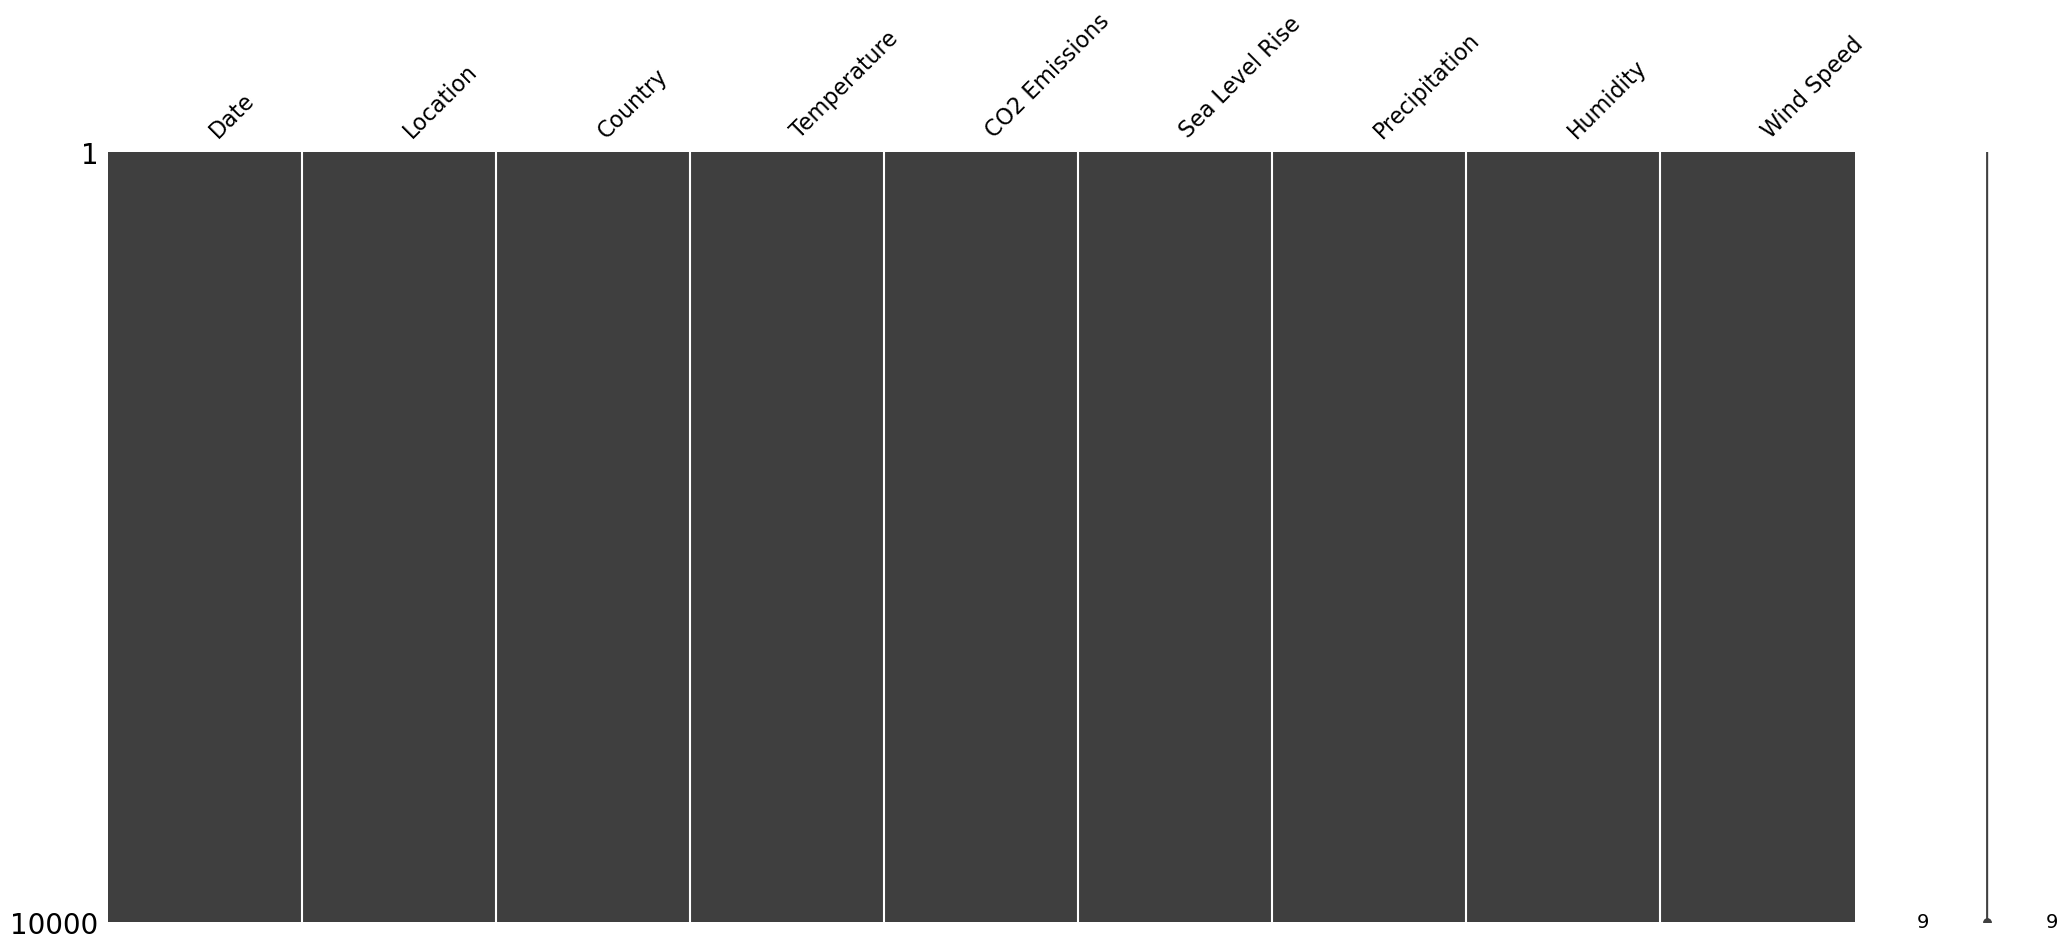

In [19]:
# visualize missing values
import missingno as msno
msno.matrix(df)

In [93]:
# Current EDA report
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = s

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
# numerical columns
num_cols = []
for col in df.columns:
    if df[col].dtypes != 'o':
        num_cols.append(col)
    

In [ ]:
# visualize the numerical columns to detect outliers
plt.figure(figsize = (20, 30))
for i, col in enumerate(num_cols):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde = True)
    ax.set_title(col + "Histogram")

In [ ]:
plt.show_html()

In [30]:
###----- Trimming the outliers using z-score ----###
# Z-score method can only be applied on columns with normal or almost normal distribution. 
# Here, If a certain value falls outside of 3 standard deviations we can say it an outlier.
mean = df['Temperature'].mean()
std = df['Temperature'].std()
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

In [32]:
df.shape

(10000, 9)

In [40]:
len(df[(df['Temperature'] >= lower_limit) & (df['Temperature'] <= upper_limit)])

9972

In [42]:
# Show the detected outliers indices
len(df[(df['Temperature'] < lower_limit) | (df['Temperature'] > upper_limit)])

28

In [44]:
# removal of the outliers
df1 = df[(df['Temperature'] >= lower_limit) & (df['Temperature'] <= upper_limit)]

In [57]:
# show the remaining indices
df1.shape

(9972, 9)

In [58]:
# Capping to set the value to upper & lower limit
df2 = df.copy()


In [59]:
df2['Temperature'] = np.where(df['Temperature'] > upper_limit, 
                              upper_limit, 
                              np.where(df['Temperature'] < lower_limit,
                                       lower_limit,
                                       df['Temperature']
                                     )
                             )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
df1.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [91]:
# in-depth report after Z-score method, removal of outlier

import sweetviz as sv1

report1 = sv1.analyze(df1)
report1.show_html()

C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = s

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [64]:
## ---- Percentile Method ----##
# Percentile - describes how a compare to other scores from the same set. 
# If a value is in kth percentile, it is greater than k percent of the total values. 
# In percentile method, if a value is greater than 99/95 percentile(depends upon the problem statement) or less than 1/5 percentile than it is consider an outlier.

# creating a df for pm
df02 = df.copy()


In [66]:
# visualize the df02
df02.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


<IPython.core.display.Javascript object>

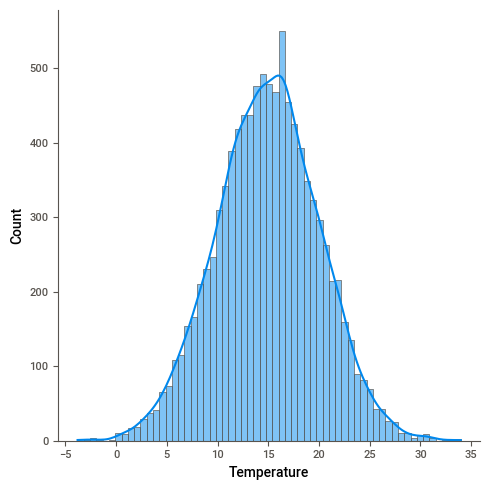

In [68]:
# Plot the df02 to detect outliers
sns.displot(df02['Temperature'], kde = True)

In [70]:
# The value with 99th percentile 
upper_limit = df02['Temperature'].quantile(0.99) 
upper_limit

26.54418440413302

In [72]:
#The value with 1th percentile 
lower_limit = df02['Temperature'].quantile(0.01)
lower_limit

3.158667894296705

In [74]:
# Trim the outliers
df02.shape

(10000, 9)

In [77]:
# the outliers indices
len(df02[(df2['Temperature'] > upper_limit) | (df2['Temperature'] < lower_limit)])

200

In [79]:
# remaining values
new_df02_1 = df02[(df2['Temperature'] <= upper_limit) & (df2['Temperature'] >= lower_limit)]

In [81]:
new_df02_1.shape

(9800, 9)

In [85]:
##---- Capping/winsorization using percentile method -----##
new_df02_2 = df02.copy()

In [87]:
new_df02_2['Temperature'] = np.where(df02['Temperature'] > upper_limit,
                                     upper_limit,
                                     np.where(df02['Temperature'] < lower_limit,
                                             lower_limit,
                                             df02['Temperature']
                                             )
                                    )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
# describe the new data
new_df02_2.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,26.544184,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [96]:
# Current EDA report after Percentile Method

report = sv.analyze(new_df02_2)
report.show_html()

C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = s

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [99]:
## -----IQR Method ----##
###############################################
########  IQR - Inter Quartile Range ##########
######## Q1 - 25th percentile #################
######## Q2 - 50th percentile (Median) ########
########## Q3 - 75th percentile ###############

# Used for skewed data. 
# In this method, we calculate the minimum and maximum value. 
# If any value is less than minimum value or greater than maximum value, then it is considered as an outlier. 
# IQR = Q3 - Q1 
# Minimum = Q1 - 1.5 * IQR 
# Maximum = Q3 + 1.5 * IQR

df03 = pd.read_csv('../GIS 4.1/GEOSTATS/R Practicals/Kaggle_DATA/train.csv')

<IPython.core.display.Javascript object>

In [101]:
df03.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

<Axes: xlabel='Fare', ylabel='Count'>

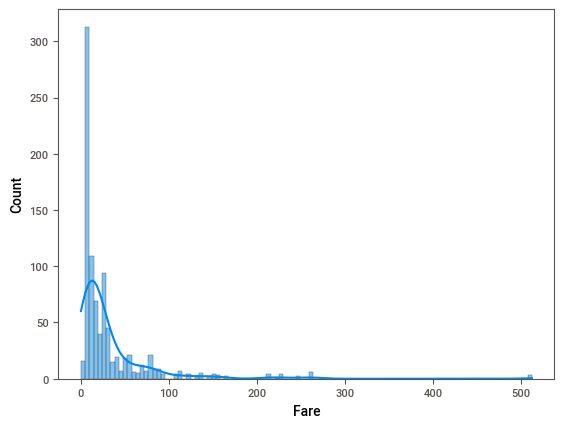

In [103]:
# we have positively skewed data
sns.histplot(df03['Fare'], kde = True)

<IPython.core.display.Javascript object>

<Axes: xlabel='Fare'>

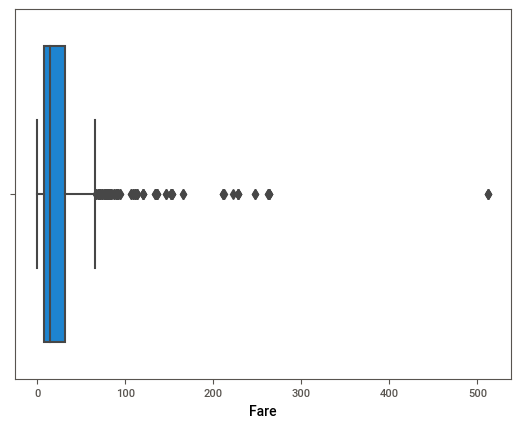

In [105]:
# visualize with a boxplot
sns.boxplot(x = df03['Fare'])

In [107]:
# summary of the change
q1 = df03['Fare'].quantile(0.25)
q3 = df03['Fare'].quantile(0.75) 
iqr = q3 - q1

In [110]:
# creating mean val and max value 
min_val = q1 - (1.5 * iqr) 
max_val = q3 + (1.5 * iqr)

In [111]:
len(df03[(df03['Fare'] > max_val) | (df03['Fare'] < min_val)])

116

In [119]:
#### -----Trimming -----####

df03.shape

(891, 12)

In [115]:
new_df03_1 = df03[(df03['Fare'] < max_val) & (df03['Fare'] > min_val)]

In [117]:
new_df03_1.shape

(775, 12)

<IPython.core.display.Javascript object>

<Axes: xlabel='Fare', ylabel='Count'>

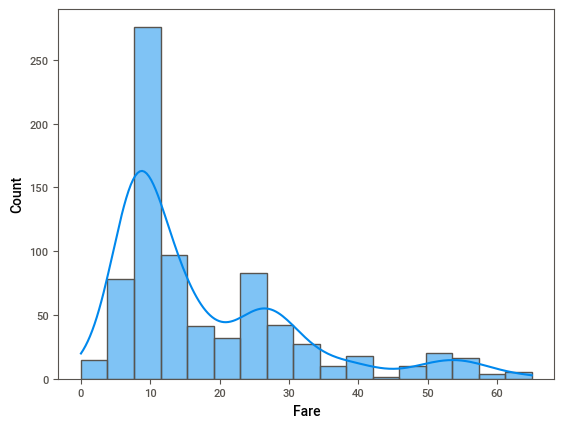

In [120]:
#Visualize the new data
sns.histplot(new_df03_1['Fare'], kde = True)

<IPython.core.display.Javascript object>

<Axes: xlabel='Fare'>

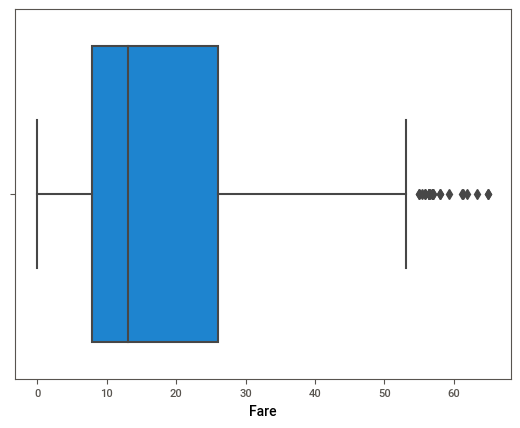

In [122]:
# Use Boxplot to detect new outliers
sns.boxplot(x = new_df03_1['Fare'])

In [124]:
#### ------ Capping ----#####
new_df03_2 = df03.copy()

In [126]:
new_df03_2['Fare'] = np.where(df03['Fare'] > max_val,
                             max_val,
                             np.where(df03['Fare'] < min_val,
                                     min_val,
                                     df03['Fare']
                                     )
                             )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
new_df03_2.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.00,1,2,C.A. 34651,27.7500,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,65.6344,B80,C


In [129]:
# report on the data

report = sv.analyze(new_df03_2)
report.show_html()

C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Programming\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Programming\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Programming\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Programming\lib\site-packages\sweetviz\series_analyzer_cat.py

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
